# **K-Means Clustering**

Para exemplificar o K-means Clustering, vamos usar o base de dados pública do Kaggle.

https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

Primeiramente, vamos fazer o import das bibliotecas e captruar a base de dados.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/dataset_Mall_Costumers.csv")
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


**Tratamento dos dados**

Antes de continuar, vamos tratar os dados numéricos para que a diferença de ordem de grandeza deles não interfira na qualidade do modelo.

O tratamento de dados será feito da seguinte forma:

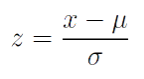

Onde Mi é a média e Sigma o desvio padrão.

Para mais informações: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [ ]:
from sklearn.preprocessing import StandardScaler   # Importar módulo do Scikit-Lear para padronização de dados.

scaler = StandardScaler()  # Declarar o método StandardScaler

colunas_para_normalizar = ["Annual Income (k$)",	"Spending Score (1-100)"]  # Escolher as colunas para padronizar.

scaler.fit(df[colunas_para_normalizar])  # Treinar o modelo de padronização com as colunas desejadas.

colunas_normalizadas = scaler.transform(df[colunas_para_normalizar])    # Executar o modelo de padronização nas colunas selecionadas.

import copy    #  Importar o copy
BaseDeDados_Original = copy.deepcopy(df)  # Guardar a base de dados original para usar na avaliação final do resultado.

for i in range(len(colunas_para_normalizar)):     # Passar as colunas padronizadas de volta para o DataFrame principal.
    df[colunas_para_normalizar[i]] = colunas_normalizadas[:,i]    

In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,-1.738999,-0.434801
1,2,Male,21,-1.738999,1.195704
2,3,Female,20,-1.700830,-1.715913
3,4,Female,23,-1.700830,1.040418
4,5,Female,31,-1.662660,-0.395980
...,...,...,...,...,...
195,196,Female,35,2.268791,1.118061
196,197,Female,45,2.497807,-0.861839
197,198,Male,32,2.497807,0.923953
198,199,Male,32,2.917671,-1.250054


É importante verificar a existência dados faltantes.

In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**Método do cotovelo**

Esse método será implementando para descobrir em quantos grupos os dados serão divididos.

O KMeans do scikit-learn já calcula o wcss e dá o nome de inertia

In [ ]:
# Escolher as colunas da base de dados que serão usadas no modelo.
df_model = df[["Annual Income (k$)",	"Spending Score (1-100)"]]


In [ ]:
# Importar o método KMeans do Scikit-Learn.
from sklearn.cluster import KMeans  

In [ ]:
# Declarar uma lista vazia para começar a armazenar as somas dos erros médios de cada quantidade de clusters.
Inercia = []    

# Executar o K-Means para 10 quantidades, de 1 a 11.
for i in range(1,11): 

    kmeans = KMeans(n_clusters= i,         # Declarar o método do K-means com a quatidade de clusters referentes ao loop da vez.
                    init='k-means++',      # k-means++ é um método otimizado de iniciar os centroides para evitar mínimos e máximos locais.
                    random_state=101)      # Padronizar uma semente aleatória para cada loop apresentar resultados compatíveis.

    kmeans.fit(df_model)               # Treinar o modelo.

    Inercia.append(kmeans.inertia_)        # Armazenar a Inercia - WCSS (somatório dos erros médios quadráticos) para cada loop.



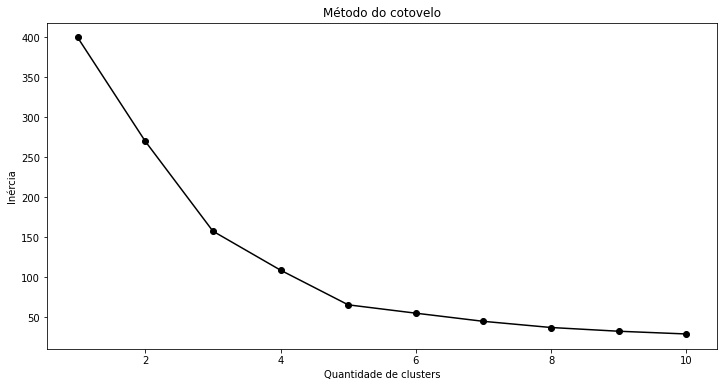

In [ ]:
# Plotar gráfico da quantidade de clusters pela Inércia.
plt.figure(figsize=(12,6))
plt.plot(range(1,11), Inercia, "ko-")
plt.title('Método do cotovelo')
plt.xlabel('Quantidade de clusters')
plt.ylabel('Inércia')
plt.show()

Como visto no gráfico, a melhor quantidade de clusters para otimizar é resultado é de 5.

Dessa forma, vamos treinar o modelo com 5 clusters e apresentar o resultado em um gráfico.

In [ ]:
# Declarar o modelo com 5 clusters, k-means++ e a mesma semente aleatória da método do cotovelo.
ModeloKMeansFinal = KMeans(n_clusters= 5, init='k-means++', random_state=101)

# Treinar o modelo e salvar os resultados dos grupos.
Resultado = ModeloKMeansFinal.fit_predict(df_model.values)

# Cria a coluna "Cluster" para adicionar os resultados ao DataFrame nos dados originais.
BaseDeDados_Original["Cluster"] = ModeloKMeansFinal.labels_

#Mostrar DataFrame
BaseDeDados_Original

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2


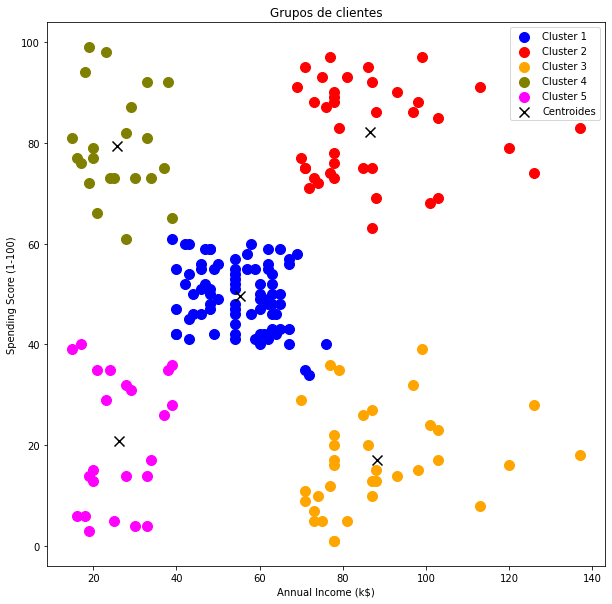

In [ ]:
# Plotar gráfico com os resultados

plt.figure(figsize=(10,10))
plt.scatter(BaseDeDados_Original["Annual Income (k$)"][BaseDeDados_Original["Cluster"]==0], BaseDeDados_Original["Spending Score (1-100)"][BaseDeDados_Original["Cluster"]==0], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(BaseDeDados_Original["Annual Income (k$)"][BaseDeDados_Original["Cluster"]==1], BaseDeDados_Original["Spending Score (1-100)"][BaseDeDados_Original["Cluster"]==1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(BaseDeDados_Original["Annual Income (k$)"][BaseDeDados_Original["Cluster"]==2], BaseDeDados_Original["Spending Score (1-100)"][BaseDeDados_Original["Cluster"]==2], s = 100, c = 'orange', label = 'Cluster 3')
plt.scatter(BaseDeDados_Original["Annual Income (k$)"][BaseDeDados_Original["Cluster"]==3], BaseDeDados_Original["Spending Score (1-100)"][BaseDeDados_Original["Cluster"]==3], s = 100, c = 'olive', label = 'Cluster 4')
plt.scatter(BaseDeDados_Original["Annual Income (k$)"][BaseDeDados_Original["Cluster"]==4], BaseDeDados_Original["Spending Score (1-100)"][BaseDeDados_Original["Cluster"]==4], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(scaler.inverse_transform(ModeloKMeansFinal.cluster_centers_)[:, 0], scaler.inverse_transform(ModeloKMeansFinal.cluster_centers_)[:, 1], s = 100, c = 'black', label = 'Centroides', marker = "x")
plt.title('Grupos de clientes')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
y_Hat = ModeloKMeansFinal.predict([[50,50]]);

In [ ]:
print(y_Hat)

[1]
